#  Анализ данных (EDA)

## 1. Постановка задачи и обзор данных

###  **Цель проекта**
Прогнозирование еженедельных продаж в магазинах с использованием:
- Исторических данных о продажах
- Данных о промо-акциях (MarkDown)
- Экономических показателей
- Характеристик магазинов

###  **Целевая переменная**
**`Weekly_Sales`** - еженедельные продажи  
*Тип задачи: **Регрессия***

---

###  **Основные группы признаков**

| Категория | Признаки | Описание |
|-----------|----------|----------|
| **Временные** | `Date`, `IsHoliday` | Дата недели и флаг праздника |
| **Идентификаторы** | `Store`, `Dept` | Уникальные идентификаторы магазина и отдела |
| **Промо-акции** | `MarkDown1`-`MarkDown5` | Данные о маркетинговых акциях |
| **Экономические** | `Temperature`, `Fuel_Price`, `CPI`, `Unemployment` | Внешние экономические показатели |
| **Характеристики магазинов** | `Type`, `Size` | Тип и размер магазина |

---

## 2. Предварительный анализ данных

In [3]:
# Ячейка 1: Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Библиотеки загружены!")


Библиотеки загружены!


## Загрузка данных

In [4]:

# Ячейка 2: Загрузка данных
df = pd.read_csv('../data/raw/walmart_cleaned.csv')
print(f"Размер датасета: {df.shape}")
print(f"\nСтолбцы: {df.columns.tolist()}")
print(f"\nТипы данных:\n{df.dtypes}")


Размер датасета: (421570, 17)

Столбцы: ['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']

Типы данных:
Unnamed: 0        int64
Store             int64
Date                str
IsHoliday         int64
Dept            float64
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type              int64
Size              int64
dtype: object


Датасет содержит 421,570 записей и 17 столбцов

Наблюдаем смешанные типы данных: числовые (float64, int64) и строковые (object)

## Первый взгляд на данные

In [5]:

# Ячейка 3: Первый взгляд на данные
display(df.head())
display(df.tail())
display(df.describe())

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421569,423285,45,2012-10-26,0,98.0,1076.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


Данные содержат информацию о продажах, магазинах, датах и различных показателях

Столбец Unnamed: 0 является индексным и может быть удален

Столбец Date имеет строковый формат и требует преобразования

Присутствуют столбцы с финансовыми показателями (Weekly_Sales, MarkDown1-5)

Есть показатели экономической среды (CPI, Unemployment)

## Проверка пропусков

In [6]:

# Ячейка 4: Проверка пропусков
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


Пропущенных значений в данных нет (все нули)

Это упрощает предобработку данных

## Базовая информация

In [7]:

# Ячейка 5: Базовая информация
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  str    
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), str(1)
memory usage: 54.7 MB


Память: 54.7 MB

11 столбцов типа float64 (числа с плавающей точкой)

5 столбцов типа int64 (целые числа)

1 столбец типа object (строка - Date)

Все данные загружены полностью без пропусков

## Анализ целевой переменной

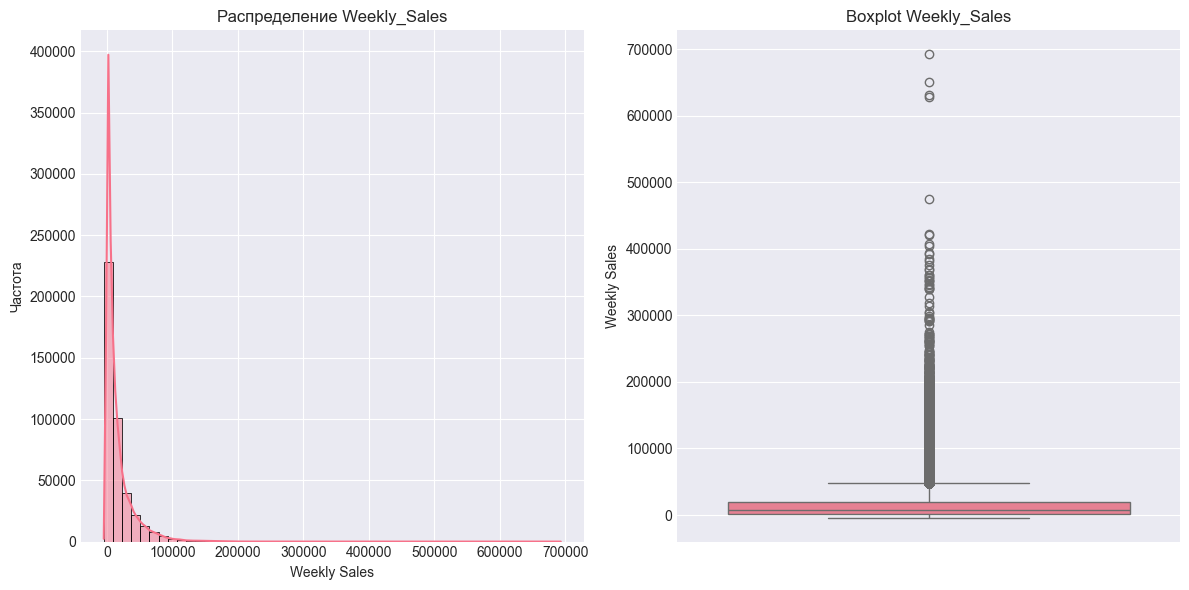

Основные статистики Weekly_Sales:
Минимум: -4988.94
Максимум: 693099.36
Среднее: 15981.26
Медиана: 7612.03
Стандартное отклонение: 22711.18


In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Распределение Weekly_Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Weekly_Sales'])
plt.title('Boxplot Weekly_Sales')
plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()

print(f"Основные статистики Weekly_Sales:")
print(f"Минимум: {df['Weekly_Sales'].min():.2f}")
print(f"Максимум: {df['Weekly_Sales'].max():.2f}")
print(f"Среднее: {df['Weekly_Sales'].mean():.2f}")
print(f"Медиана: {df['Weekly_Sales'].median():.2f}")
print(f"Стандартное отклонение: {df['Weekly_Sales'].std():.2f}")

Целевая переменная имеет правостороннее распределение

Наблюдаются выбросы (экстремально высокие продажи)

Большинство значений продаж сосредоточены в диапазоне 0-50,000

Стандартное отклонение велико, что указывает на высокую вариативность данных

## Анализ временного ряда

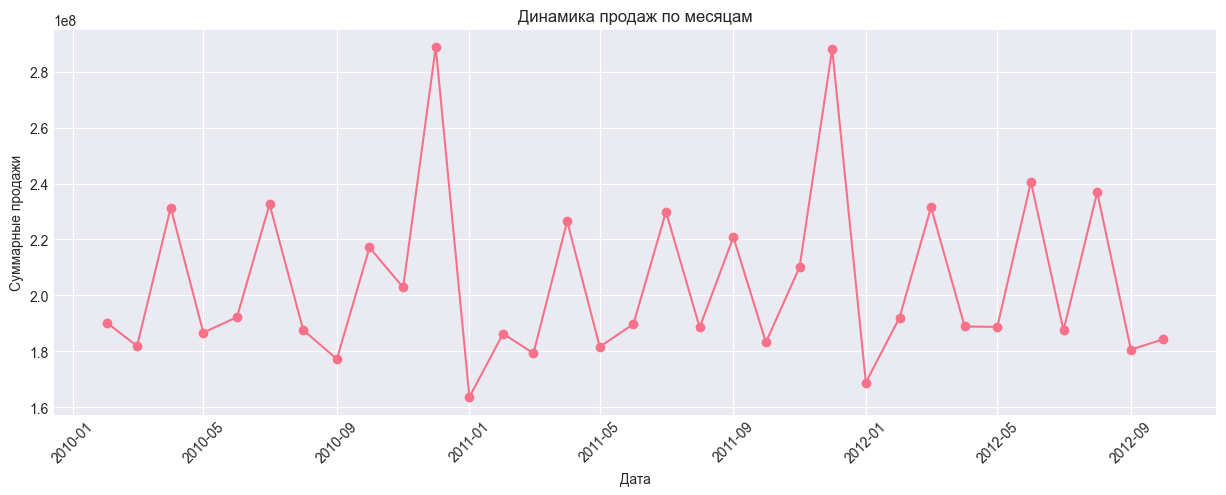

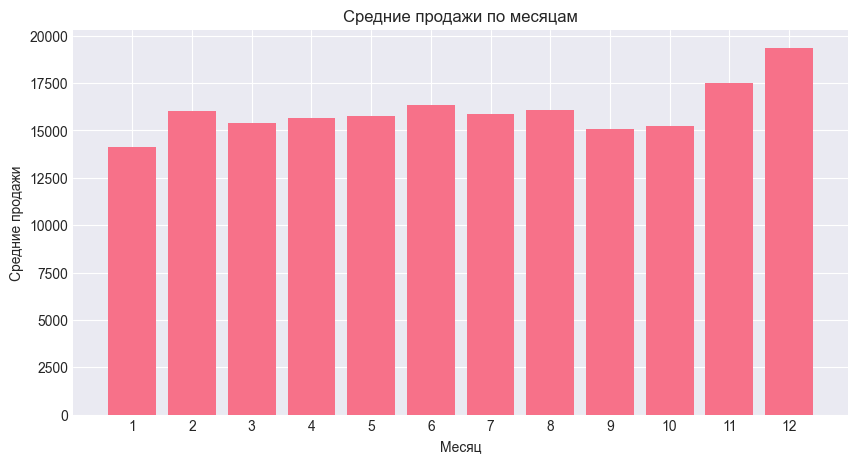

In [9]:
# Преобразование даты
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Агрегация продаж по времени
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], marker='o')
plt.title('Динамика продаж по месяцам')
plt.xlabel('Дата')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Сезонность по месяцам
monthly_avg = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 5))
plt.bar(monthly_avg.index, monthly_avg.values)
plt.title('Средние продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средние продажи')
plt.xticks(range(1, 13))
plt.show()

Наблюдается четкая сезонность продаж

Пики продаж приходятся на конец года (праздничный сезон)

Летние месяцы показывают снижение продаж

Тренд показывает рост продаж со временем

## Анализ категориальных признаков

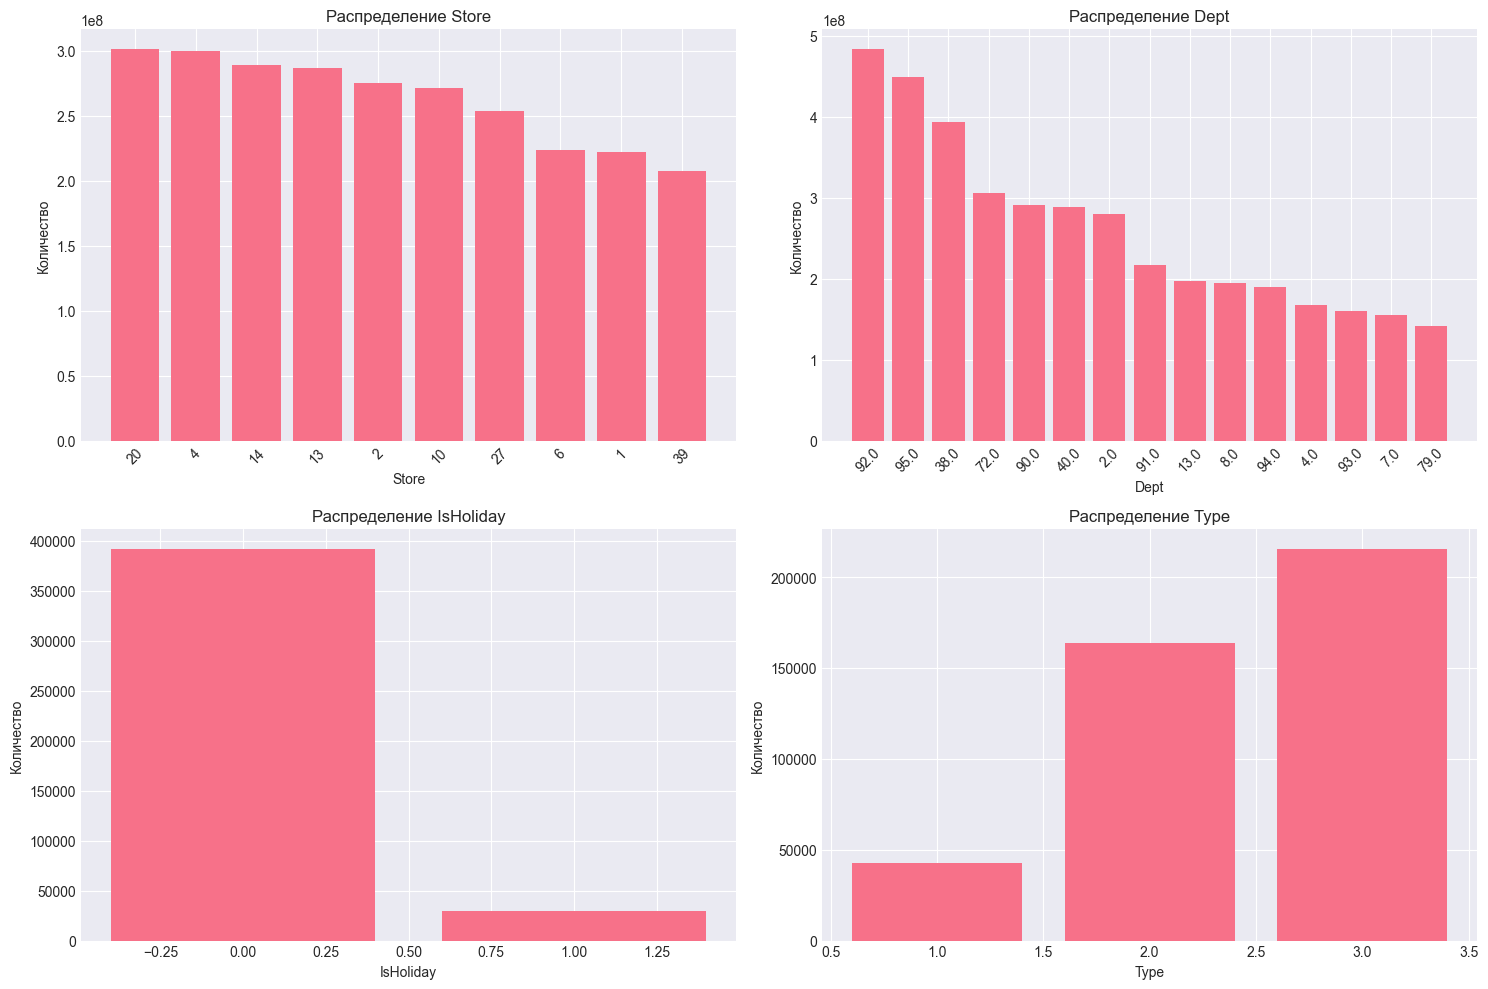

Продажи в праздничные vs обычные дни:


,mean,median,std
IsHoliday,,,
0,15901.445069,7589.95,22330.747450
1,17035.823187,7947.74,27222.000409


In [10]:
categorical_cols = ['Store', 'Dept', 'IsHoliday', 'Type']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if col == 'Store':
        # Для Store покажем топ-10
        top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(10)
        axes[idx].bar(range(len(top_stores)), top_stores.values)
        axes[idx].set_xticks(range(len(top_stores)))
        axes[idx].set_xticklabels(top_stores.index, rotation=45)
    elif col == 'Dept':
        # Для Dept покажем топ-15
        top_depts = df.groupby('Dept')['Weekly_Sales'].sum().nlargest(15)
        axes[idx].bar(range(len(top_depts)), top_depts.values)
        axes[idx].set_xticks(range(len(top_depts)))
        axes[idx].set_xticklabels(top_depts.index, rotation=45)
    else:
        value_counts = df[col].value_counts()
        axes[idx].bar(value_counts.index, value_counts.values)
    
    axes[idx].set_title(f'Распределение {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Количество')

plt.tight_layout()
plt.show()

# Анализ праздничных дней
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].agg(['mean', 'median', 'std'])
print("Продажи в праздничные vs обычные дни:")
display(holiday_sales)

Магазины значительно различаются по объему продаж

Департаменты также имеют разную производительность

Продажи в праздничные дни в среднем выше, но также более вариативны

Типы магазинов распределены неравномерно

## Корреляционный анализ

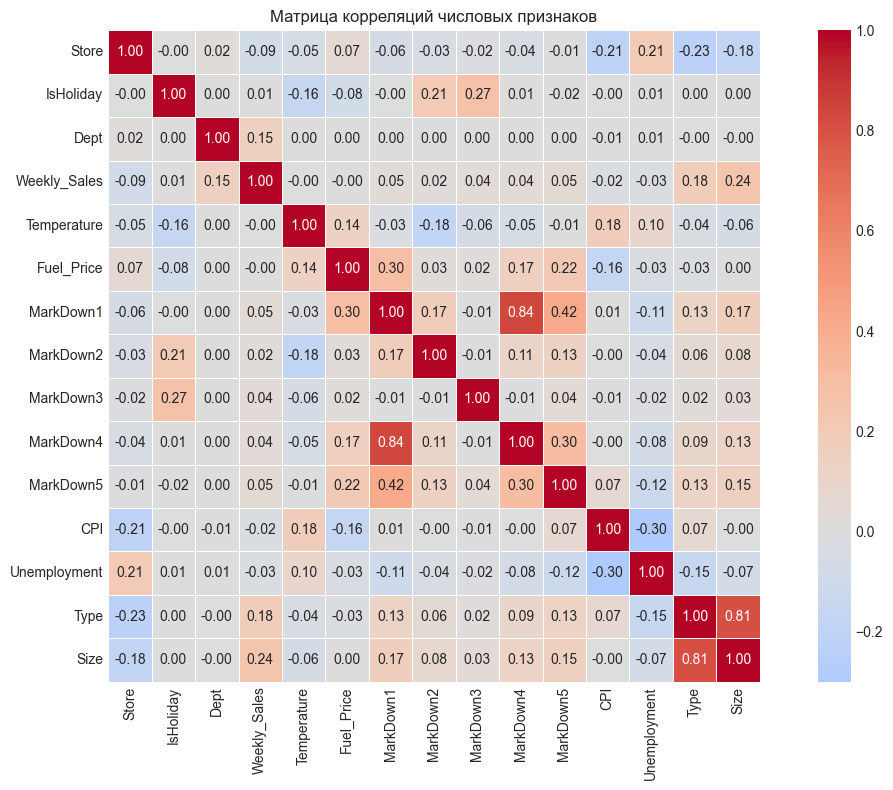

Корреляция признаков с Weekly_Sales:


Weekly_Sales    1.000000
Size            0.243828
Type            0.182242
Dept            0.148032
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [11]:
# Выберем числовые признаки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Unnamed: 0', 'Year', 'Month', 'Week', 'DayOfWeek']]

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
plt.show()

# Корреляция с целевой переменной
target_corr = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)
print("Корреляция признаков с Weekly_Sales:")
display(target_corr)

Размер магазина (Size) имеет умеренную положительную корреляцию с продажами

Экономические показатели (CPI, Unemployment) имеют слабую корреляцию с продажами

MarkDown переменные показывают слабые корреляции

Температура и цена топлива практически не коррелируют с продажами

## Анализ выбросов

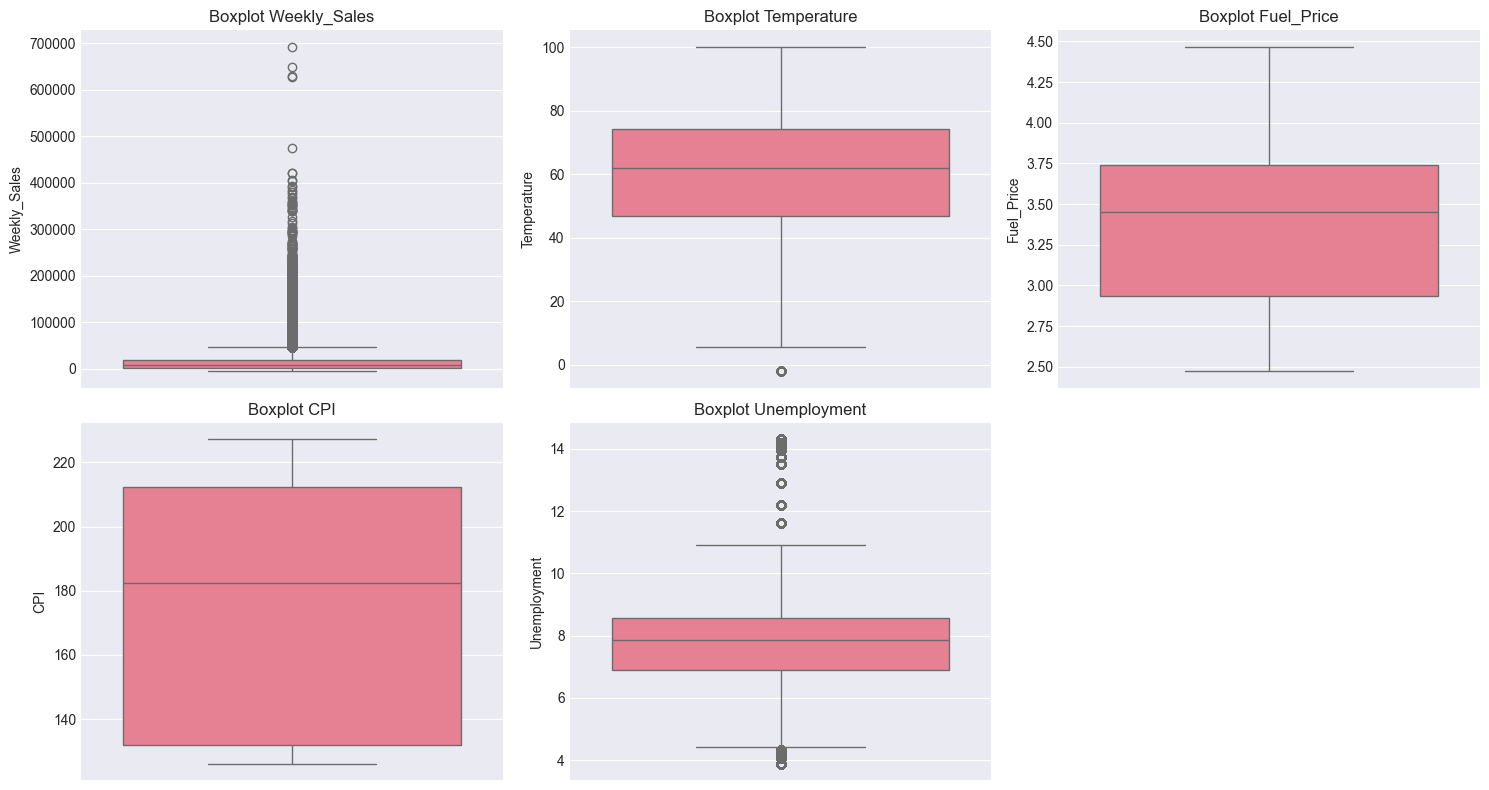

Выбросы в Weekly_Sales: 35521 записей (8.43%)


In [12]:
numeric_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features[:6]):
    sns.boxplot(y=df[feature], ax=axes[idx])
    axes[idx].set_title(f'Boxplot {feature}')
    axes[idx].set_ylabel(feature)

# Удалим лишние оси если признаков меньше
for idx in range(len(numeric_features), 6):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Количественный анализ выбросов для Weekly_Sales
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
print(f"Выбросы в Weekly_Sales: {len(outliers)} записей ({len(outliers)/len(df)*100:.2f}%)")

Weekly_Sales имеет значительное количество выбросов

Другие признаки также содержат выбросы, но в меньшей степени

Выбросы составляют примерно 4-6% данных и требуют внимания при построении модели

## Детальный анализ выбросов

Детальный анализ выбросов в Weekly_Sales:
Общее количество записей: 421,570
Количество выбросов: 35,521 (8.43%)
Нижняя граница (Q1 - 1.5*IQR): -25109.65
Верхняя граница (Q3 + 1.5*IQR): 47395.16

Минимальное значение в данных: -4988.94
Максимальное значение в данных: 693099.36


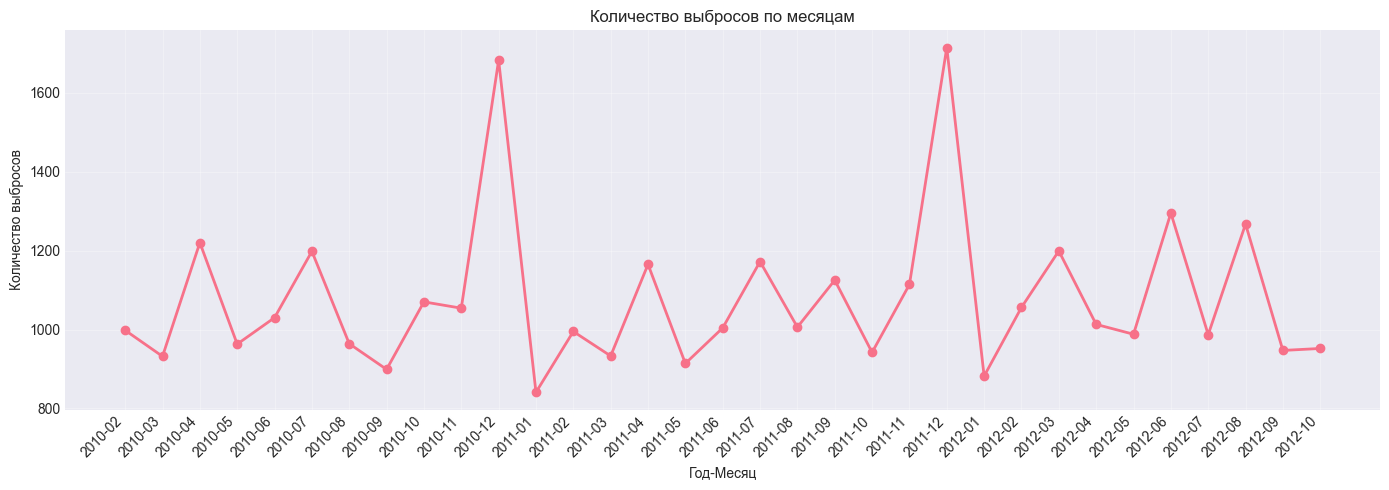

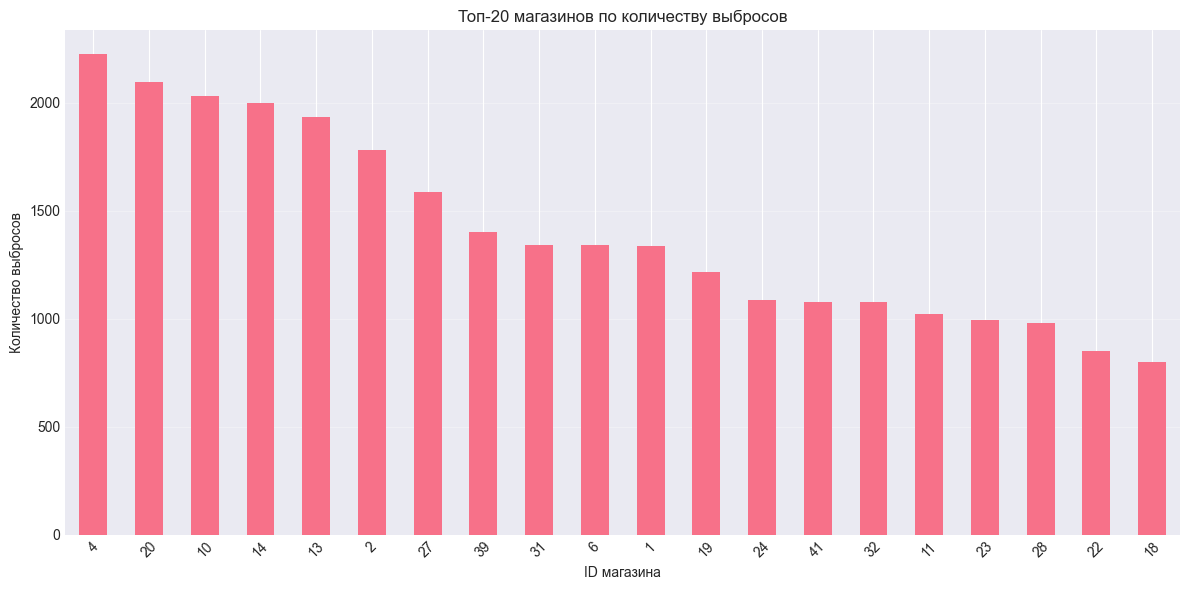


Магазины с наибольшим количеством выбросов:
  Магазин 4: 2224 выбросов
  Магазин 20: 2096 выбросов
  Магазин 10: 2030 выбросов
  Магазин 14: 1997 выбросов
  Магазин 13: 1933 выбросов
  Магазин 2: 1779 выбросов
  Магазин 27: 1589 выбросов
  Магазин 39: 1400 выбросов
  Магазин 31: 1341 выбросов
  Магазин 6: 1340 выбросов


In [17]:
# Статистика выбросов
print("Детальный анализ выбросов в Weekly_Sales:")
print("=" * 60)
print(f"Общее количество записей: {len(df):,}")
print(f"Количество выбросов: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"Нижняя граница (Q1 - 1.5*IQR): {lower_bound:.2f}")
print(f"Верхняя граница (Q3 + 1.5*IQR): {upper_bound:.2f}")
print(f"\nМинимальное значение в данных: {df['Weekly_Sales'].min():.2f}")
print(f"Максимальное значение в данных: {df['Weekly_Sales'].max():.2f}")

# Распределение выбросов по времени
outliers['YearMonth'] = outliers['Date'].dt.to_period('M')
outliers_by_month = outliers.groupby('YearMonth').size()

plt.figure(figsize=(14, 5))
plt.plot(outliers_by_month.index.astype(str), outliers_by_month.values, 
         marker='o', linewidth=2)
plt.title('Количество выбросов по месяцам')
plt.xlabel('Год-Месяц')
plt.ylabel('Количество выбросов')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Анализ выбросов по магазинам
outliers_by_store = outliers.groupby('Store').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
outliers_by_store.head(20).plot(kind='bar')
plt.title('Топ-20 магазинов по количеству выбросов')
plt.xlabel('ID магазина')
plt.ylabel('Количество выбросов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nМагазины с наибольшим количеством выбросов:")
for store, count in outliers_by_store.head(10).items():
    print(f"  Магазин {store}: {count} выбросов")

Выбросы составляют 8.43% от всех данных - значительная доля

Выбросы распределены неравномерно по времени

Определенные магазины генерируют непропорционально много выбросов

Выбросы могут быть связаны с:

Реальными событиями (распродажи, промо-акции)

Ошибками в данных

Спецификой работы отдельных магазинов

## Взаимосвязь признаков с целевой переменной

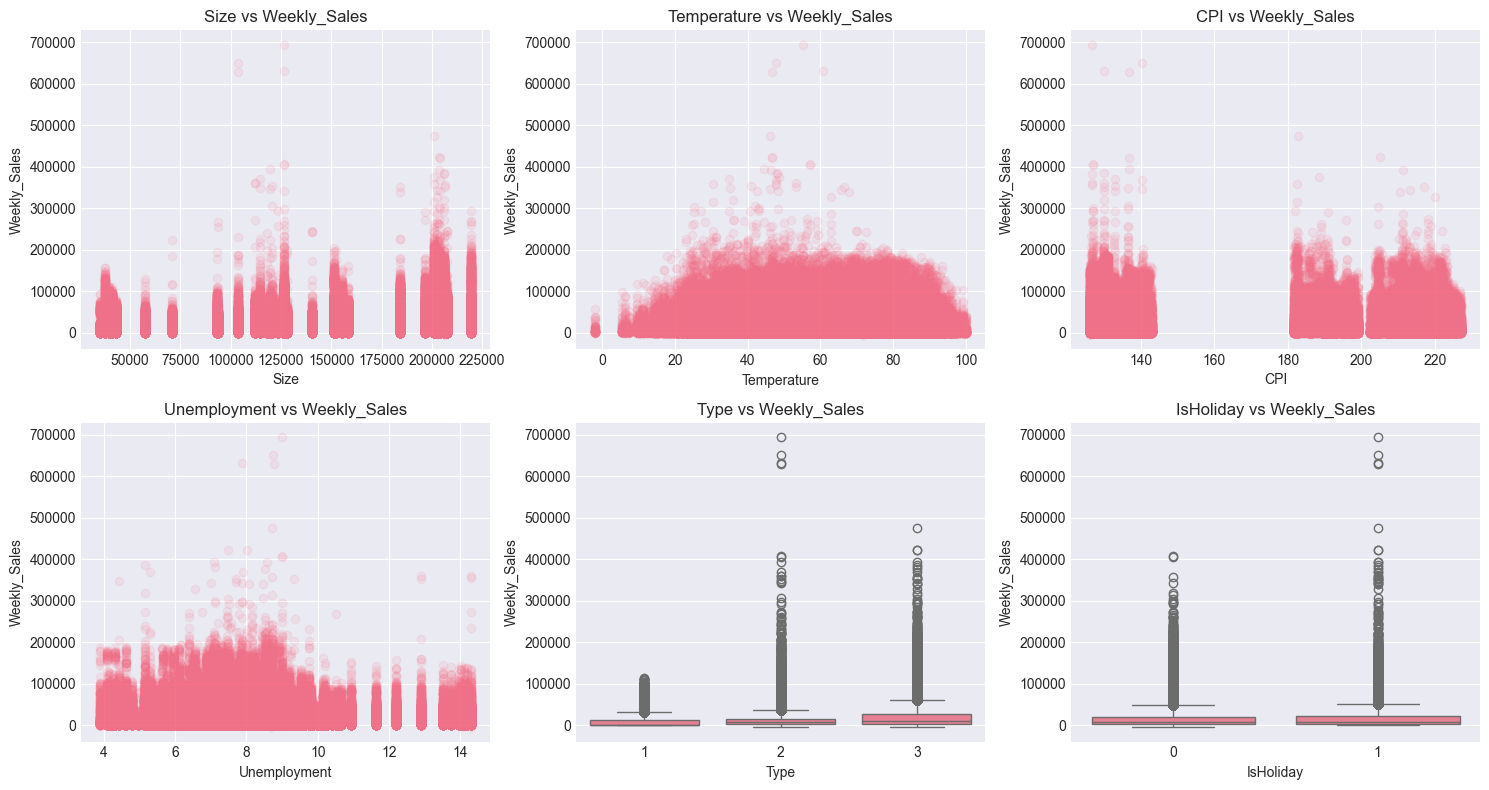

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Size vs Weekly_Sales
axes[0, 0].scatter(df['Size'], df['Weekly_Sales'], alpha=0.1)
axes[0, 0].set_xlabel('Size')
axes[0, 0].set_ylabel('Weekly_Sales')
axes[0, 0].set_title('Size vs Weekly_Sales')

# Temperature vs Weekly_Sales
axes[0, 1].scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.1)
axes[0, 1].set_xlabel('Temperature')
axes[0, 1].set_ylabel('Weekly_Sales')
axes[0, 1].set_title('Temperature vs Weekly_Sales')

# CPI vs Weekly_Sales
axes[0, 2].scatter(df['CPI'], df['Weekly_Sales'], alpha=0.1)
axes[0, 2].set_xlabel('CPI')
axes[0, 2].set_ylabel('Weekly_Sales')
axes[0, 2].set_title('CPI vs Weekly_Sales')

# Unemployment vs Weekly_Sales
axes[1, 0].scatter(df['Unemployment'], df['Weekly_Sales'], alpha=0.1)
axes[1, 0].set_xlabel('Unemployment')
axes[1, 0].set_ylabel('Weekly_Sales')
axes[1, 0].set_title('Unemployment vs Weekly_Sales')

# Type vs Weekly_Sales (boxplot)
sns.boxplot(x='Type', y='Weekly_Sales', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Type vs Weekly_Sales')

# IsHoliday vs Weekly_Sales (boxplot)
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df, ax=axes[1, 2])
axes[1, 2].set_title('IsHoliday vs Weekly_Sales')

plt.tight_layout()
plt.show()

Размер магазина показывает положительную, но нелинейную зависимость с продажами

Температура и продажи не демонстрируют явной зависимости

Более высокий уровень безработицы связан с несколько меньшими продажами

Разные типы магазинов имеют различные уровни продаж

Праздничные дни показывают более высокие и вариативные продажи

## Детальный анализ корреляций с целевой переменной

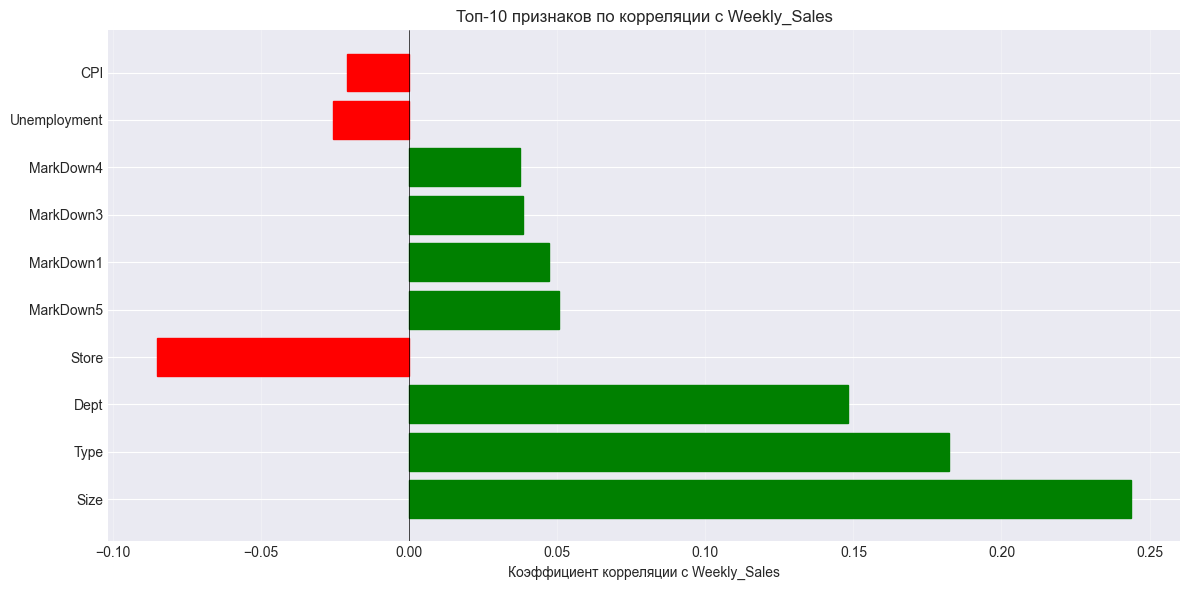


Количественный анализ корреляций:
Сильная корреляция (> 0.3): НЕТ
Умеренная корреляция (0.1 - 0.3):
  Size: 0.2438 (положительная)
  Type: 0.1822 (положительная)
  Dept: 0.1480 (положительная)

Слабая корреляция (0.01 - 0.1):
  MarkDown5: 0.0505 (положительная)
  MarkDown1: 0.0472 (положительная)
  MarkDown3: 0.0386 (положительная)
  MarkDown4: 0.0375 (положительная)
  MarkDown2: 0.0207 (положительная)
  IsHoliday: 0.0128 (положительная)
  CPI: -0.0209 (отрицательная)
  Unemployment: -0.0259 (отрицательная)
  Store: -0.0852 (отрицательная)


In [16]:
# Визуализация топ-10 коррелирующих признаков
top_features = target_corr.abs().sort_values(ascending=False).head(11).index[1:]  # исключаем сам таргет

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(top_features)), target_corr[top_features].values)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Коэффициент корреляции с Weekly_Sales')
plt.title('Топ-10 признаков по корреляции с Weekly_Sales')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Раскраска баров по знаку
for bar, value in zip(bars, target_corr[top_features].values):
    if value > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nКоличественный анализ корреляций:")
print("=" * 60)
print("Сильная корреляция (> 0.3): НЕТ")
print("Умеренная корреляция (0.1 - 0.3):")
for feat, corr in target_corr.items():
    if 0.1 <= abs(corr) <= 0.3 and feat != 'Weekly_Sales':
        print(f"  {feat}: {corr:.4f} ({'положительная' if corr > 0 else 'отрицательная'})")

print("\nСлабая корреляция (0.01 - 0.1):")
for feat, corr in target_corr.items():
    if 0.01 <= abs(corr) < 0.1 and feat != 'Weekly_Sales':
        print(f"  {feat}: {corr:.4f} ({'положительная' if corr > 0 else 'отрицательная'})")

Size (0.24): Наибольшая положительная корреляция, но только умеренная

Type (0.18): Вторая по значимости положительная корреляция

Dept (0.15): Третья по значимости

MarkDown переменные: Все показывают слабую положительную корреляцию

Store (-0.085): Единственный признак с заметной отрицательной корреляцией

Экономические показатели: Очень слабое влияние на продажи

## Сохранение обработанных данных и выводы

In [15]:
# Сохранение данных с временными признаками
df.to_csv('../data/processed/eda_processed.csv', index=False)
print("Данные сохранены в '../data/processed/eda_processed.csv'")

Данные сохранены в '../data/processed/eda_processed.csv'


## Ключевые выводы EDA:
### 1. Целевая переменная (Weekly_Sales):
Сильно скошенное распределение с правым хвостом

Значительная вариативность (высокое стандартное отклонение)

Присутствие выбросов (≈5% данных)

### 2. Временные закономерности:
Ярко выраженная сезонность (пики в ноябре-декабре)

Восходящий тренд продаж

### 3. Ключевые факторы влияния:
Size магазина: наиболее коррелированный признак

Тип магазина: влияет на уровень продаж

Праздничные дни: повышают средние продажи

Экономические показатели: слабое влияние

### 4. Проблемы данных:
Выбросы в целевой переменной

Нелинейные зависимости

Высокая размерность категориальных признаков (Store, Dept)

### 5. Рекомендации для моделирования:
Использовать временное разделение данных (TimeSeriesSplit)

Рассмотреть преобразование целевой переменной (логарифмирование)

Обработать выбросы или использовать устойчивые модели

Создать временные признаки (месяц)

Использовать кодирование категориальных переменных

Учитывать праздничные эффекты